In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [3]:
T_data = [c.baryon_temp for c in clusters]

In [25]:
ndim, nwalkers = 2, 5
log_sigma0 = np.random.uniform(low=-40, high=-10, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((5,))
p0[:,1]= log_mchi.reshape((5,))
p0

array([[-16.81277534,  -6.55190513],
       [-36.64749281,  -3.06316298],
       [-27.18412441,  -8.6559186 ],
       [-16.300925  ,  -3.95027589],
       [-22.84726726,  -5.51731336]])

In [39]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters])

In [40]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-16.81277534  -6.55190513]
[-36.64749281  -3.06316298]


[-27.18412441  -8.6559186 ]
[-16.300925    -3.95027589]
[-22.84726726  -5.51731336]
[-32.79352705  -9.79388615]
[-15.85799998  -1.69897976]
[-16.91173611  -7.05490226]
[-22.40400531  -5.41120707]
[-26.34647818  -9.1509591 ]
[-15.75685738  -1.18489287]
[-27.51211722  -3.88248029]
[-21.20603169  -8.00893869]
[-40.60495875  -2.41077328]
[-7.33352757 -8.93233516]
[-25.01020991  -7.88340137]
[-45.28125006  -0.76973351]
[-23.10473468  -5.20149675]
[-20.60136597  -7.43236289]
[-36.48208052  -0.89346366]
[-22.94600646  -5.92533868]
[-30.43132774  -8.43799862]
[-18.42780276  -2.88310307]
[-18.8752995   -7.25578091]
[-50.73004367  -0.34091279]
[-21.87603897  -5.0755215 ]
[-32.35282281  -5.73013808]
[-28.56168996  -2.08556491]
[-40.8199947   -2.49213652]
[-25.07032065  -7.88955088]
[-20.36998141  -4.11795707]
[-18.48940344  -8.06590235]
[ -5.76030362 -10.10271845]
[ -7.56486448 -12.99934884]
[-21.69647612  -4.96135388]
[-8.72747943 -9.4586188 ]
[-51.06685588  -0.26779928]
[-21.65311417  -4.933783

[-19.74444822  -8.33576042]
[-56.53428266  -2.43144487]
[-46.03040812  -4.10309921]
[-19.74392164  -2.14348245]
[-12.91356568  -6.55830231]
[-19.75568343 -12.33201687]
[-14.20250585  -6.46274338]
[-7.74034171 -0.50911208]
[-17.843934    -3.60417851]
[-43.61863186  -3.87672476]
[-19.75094373 -16.74063601]
[-19.76167387  -8.73552487]
[-36.11083396  -3.80164506]
[-19.74703351  -9.6711098 ]
[-19.7436033   -3.46944583]
[-19.76561806  -2.74531229]
[-19.75920318 -12.48786079]
[-19.75719955 -10.77428196]
[-19.72939101  -0.99972807]
[-34.2963787   -6.57148229]
[-19.76321642  -6.39278827]
[-19.76561202 -16.67404256]
[-38.30912457  -4.4367258 ]
[-19.75171628 -14.76721385]
[-19.74513702  -5.3015205 ]
[-19.76374224  -5.59419611]
[-19.75251927  -8.1219971 ]
[-19.74962401 -11.7570354 ]
[-19.76597905 -16.91378475]
[-51.25494275  -4.59348515]
[-19.75823005  -4.56266788]
[-19.7460866  -23.58671467]
[-4.94639064 -0.24686589]
[-19.7452638  -24.28294643]
[-19.7413339   -0.81583294]
[-1.40346397 -4.54470906

In [41]:
n_steps=500
sampler.run_mcmc(state, n_steps, progress=True)

[-34.90748152  -7.67918003]
[-19.75582362  -7.13373644]
[-19.74521584 -18.12172757]
[-48.92104677 -12.14420187]
[-19.73822274 -25.36547368]
[-19.73373928  -0.62787719]
[-19.7532761  -1.6512237]
[-63.50361184 -14.6494266 ]
[-19.7449219  -18.63832713]
[-14.39611175  -6.21295998]
[-19.75137905  -7.28988898]
[-83.42787992 -18.07233394]
[-19.74272608  -2.63457277]
[-19.74002133 -27.25107836]
[-9.71278262 -5.40838329]
[-108.51823919  -22.32092508]
[-19.74735501 -14.36212735]
[-19.74085939  -0.5230744 ]
[-19.76185951  -9.64123267]
[-19.74294288  -5.39719267]
[-80.91855696 -15.89003434]
[-19.75157444 -25.62910586]
[-19.74153334  -0.95659782]
[-19.76553988 -10.46694207]
[-19.75716585  -8.5881869 ]
[-98.92720933 -17.48705421]
[-19.75017584  -4.55500581]
[-50.40972896 -22.47636477]
[-76.6622418  -13.02999443]
[-19.74826705 -16.79751291]
[-19.76909664 -11.2649174 ]
[-160.53321854  -29.81950724]
[-19.74896257 -18.65472588]
[-19.78761015 -18.95937276]
[-19.7536817   -5.90402497]
[-19.75836251  -9.15

[ -19.75517541 -286.88941875]
[-3649937.30108016  -725112.13580853]
[-741560.99663595 -147490.4668017 ]
[-3970834.74653536  -788838.11510604]
[ -19.75344463 -186.57027324]
[ -19.75483864 -338.64237043]
[-19.74467651 -11.78261879]
[ -19.75520584 -282.21356454]
[-6842247.01838461 -1359218.78883689]
[-587803.11671069 -116961.27144471]
[-19.75261677 -51.14972423]
[ -19.75518746 -260.0543829 ]
[-2296781.75492553  -456256.34416388]
[-851475.97117224 -169205.05950375]
[-4204907.4897091   -835334.59708544]
[ -19.75532806 -197.78769978]
[ -19.75526423 -241.88076934]
[-12824324.68617176  -2547505.65516879]
[ -19.7558094  -149.02640031]
[-22042058.85762711  -4378375.13982312]
[-19.75639094 -20.69789367]
[ -19.76179398 -429.23478078]
[-12029731.33908721  -2389552.36797855]
[-19.76851092 -37.47468205]
[ -19.75543516 -231.60801209]
[-19.74213832  -0.96906152]
[ -19.7552716  -267.70241509]
[-14530915.435924    -2886387.57853898]
[-19.75255099 -50.82355021]
[-19.75616506 -70.54283177]
[-6913674.972983

[-8.9350887e+10 -1.7748661e+10]
[-19.76861017 -85.95081122]
[-4.28768311e+10 -8.51705416e+09]
[ -19.75164331 -249.46237014]
[-6.77780330e+10 -1.34634291e+10]
[ -19.77587105 -230.38642517]
[ -19.75160055 -245.89825612]
[-2.51624099e+10 -4.99826134e+09]
[-19.75527657 -61.09329171]
[-3.88897290e+10 -7.72505614e+09]
[ -19.77623287 -222.23791699]
[ -19.74314537 -324.50502517]
[-9.96060605e+10 -1.97857488e+10]
[ -19.76327102 -137.39929333]
[-4.00334172e+10 -7.95223841e+09]
[-1.92841669e+10 -3.83060713e+09]
[-19.74355754  -7.7310858 ]
[ -19.75462773 -217.75491362]
[-9.09533881e+10 -1.80669819e+10]
[ -19.76392912 -131.28100209]
[-1.15141510e+11 -2.28717106e+10]
[-19.75425469 -72.39210352]
[ -19.75828416 -283.63428021]
[-6.74091083e+10 -1.33901460e+10]
[-19.74681899 -77.06162037]
[-19.75450903 -69.57987192]
[ -19.76001251 -314.77464025]
[-6.32307753e+10 -1.25601618e+10]
[ -19.76357795 -121.45295338]
[ -19.75909809 -343.8596785 ]
[-19.75157818 -52.81576133]
[-19.74953821 -19.36947477]
[-8.317570

[-19.74275228  -2.25920488]
[-1.36492398e+12 -2.71128511e+11]
[ -19.75668855 -151.61450687]
[-19.76102018 -86.40121047]
[-19.76501688  -8.06633287]
[-1.71417018e+12 -3.40502780e+11]
[ -19.75095724 -283.63371758]
[-6.98367733e+11 -1.38723773e+11]
[-1.89000683e+12 -3.75430973e+11]
[ -19.76550459 -107.05643033]
[-3.02374597e+12 -6.00636925e+11]
[ -19.74430776 -473.33291273]
[ -19.76137505 -122.38342179]
[-19.76048257 -31.88954439]
[-19.74479501 -74.77793103]
[-1.95574617e+12 -3.88489436e+11]
[ -19.75392069 -205.31289237]
[ -19.76201462 -187.23419958]
[-3.67725907e+12 -7.30450774e+11]
[-19.74566541  -6.85420292]
[ -19.76212274 -186.99271678]
[ -19.76052293 -324.45768804]
[-19.77473281 -55.96702288]
[-3.40034097e+12 -6.75443759e+11]
[ -19.75688555 -198.69054215]
[-1.64425083e+12 -3.26614000e+11]
[-9.09102567e+11 -1.80584142e+11]
[-4.55457344e+12 -9.04720508e+11]
[ -19.75733973 -177.62933641]
[ -19.78083586 -364.92605643]
[-19.76081999 -16.24233699]
[-19.75162469 -87.17220628]
[-19.75908808 

[-19.75651312 -76.4237917 ]
[ -19.76251161 -108.71487222]
[ -19.75910071 -218.38579703]
[-8.68418963e+15 -1.72502750e+15]
[ -19.75169918 -123.27322335]
[-19.76111346  -3.78617056]
[ -19.7509042  -112.60829175]
[-1.60925370e+16 -3.19662169e+15]
[ -19.76333396 -279.35822343]
[-19.76876674  -4.63278911]
[-2.62643977e+16 -5.21716019e+15]
[ -19.76890196 -354.05507101]
[ -19.75945532 -223.49333865]
[ -19.76072509 -241.78207853]
[-1.76956776e+16 -3.51506955e+15]
[ -19.76329988 -275.12939813]
[-19.76099715 -75.06143245]
[-2.56928360e+16 -5.10362516e+15]
[-19.74999355 -99.34375454]
[ -19.76406678 -341.75912947]
[-5.04531314e+15 -1.00220105e+15]
[-9.30165468e+14 -1.84768076e+14]
[ -19.76045808 -405.40866624]
[ -19.76145499 -114.83991136]
[-4.57623311e+16 -9.09022985e+15]
[-7.74086186e+16 -1.53764487e+16]
[ -19.76072243 -243.41029919]
[ -19.76494564 -295.38264977]
[-1.51125428e+17 -3.00195562e+16]
[ -19.76641898 -377.59377033]
[-1.00575517e+17 -1.99783216e+16]
[ -19.76085315 -163.30587689]
[-19.7

[ -19.76487448 -133.65217583]
[-19.76401323 -50.42628928]
[-2.00681604e+19 -3.98633954e+18]
[-19.74274759  -1.98742122]
[-19.74974316 -11.89067901]
[-1.06702518e+20 -2.11953891e+19]
[-19.76165574 -45.05641397]
[ -19.77363062 -227.09223612]
[-19.74780418  -9.12047169]
[-1.13223504e+20 -2.24907177e+19]
[ -19.77733584 -207.58158616]
[-19.7608894  -42.33688105]
[-19.75705879 -28.74322357]
[-1.91865918e+20 -3.81122476e+19]
[-19.76324557 -96.32688069]
[-19.75026883 -16.02824173]
[-19.76112088 -47.6411117 ]
[-6.83694946e+19 -1.35809170e+19]
[ -19.76684165 -112.83382821]
[-1.17930448e+20 -2.34257051e+19]
[ -19.76660038 -110.75989421]
[-2.12648201e+19 -4.22404404e+18]
[-8.77426501e+19 -1.74292008e+19]
[-19.75846665 -35.29294636]
[-1.82849051e+20 -3.63211370e+19]
[-7.10123721e+18 -1.41058982e+18]
[ -19.7902582  -218.40112826]
[-19.75388758 -29.67662631]
[-1.00055911e+20 -1.98751070e+19]
[-19.76590538 -51.06215911]
[-1.31461650e+20 -2.61135433e+19]
[-19.76416687 -95.23877333]
[-19.74906967 -15.37

[-19.7580321  -72.86609579]
[-1.32425899e+21 -2.63050816e+20]
[-19.75680332 -36.03729545]
[ -19.75903632 -102.96449407]
[-7.75829865e+22 -1.54110851e+22]
[-1.02528918e+23 -2.03663452e+22]
[-19.74901928 -41.12434729]
[-19.75673225 -15.11436022]
[ -19.76689455 -151.47724266]
[-19.75569398 -18.87630513]
[-1.50671278e+23 -2.99293440e+22]
[ -19.76015283 -145.53495929]
[-4.98174483e+22 -9.89573836e+21]
[-4.42730089e+22 -8.79439086e+21]
[-19.75638696 -14.78671586]
[-1.08764076e+23 -2.16048970e+22]
[-19.75650855 -14.06910738]
[-1.22720065e+23 -2.43771148e+22]
[-19.76471551 -30.71740936]
[ -19.75492837 -102.6382983 ]
[-2.10466044e+23 -4.18069767e+22]
[-19.75836081 -15.71541892]
[ -19.75627251 -113.67466745]
[-3.64379659e+23 -7.23803785e+22]
[-19.7566709  -94.98664053]
[-3.35019825e+23 -6.65483408e+22]
[-19.75812492 -26.78062558]
[-19.75756551 -53.02167868]
[ -19.75913647 -111.37204249]
[-2.36179852e+23 -4.69147678e+22]
[ -19.75977454 -135.07188155]
[-19.75542616 -13.99006983]
[-2.25705604e+23 -

State([[-1.97593119e+01 -1.86088257e+02]
 [-1.95839460e+25 -3.89015520e+24]
 [-1.97609496e+01 -1.06590598e+02]
 [-1.97426401e+01 -1.74261960e+00]
 [-1.97572187e+01 -3.44945079e+01]], log_prob=[-1315.0378401  -7131.62552308 -1315.29318238 -1306.50386036
 -1314.89938133], blobs=None, random_state=('MT19937', array([3942967667, 1917121480, 1026338510,  171647026, 3619785900,
       2592493783, 3923704198, 3542772777,  848331384, 1217275034,
        844623048, 3717390371, 4182058522, 4083314221, 3059091941,
       2678459385, 3199078930, 1019262744, 1655276920, 3180180582,
       3017538392,  967501890, 2665470934, 3417518625, 1547804021,
       3618188854, 2091128784, 3618143577, 4223441690, 2236793308,
       1313886119, 2987104076, 2758478516, 1180149068, 3755981389,
       1816046237, 4164586631, 1003642359, 1553559239,  571153117,
       2938402642,  800359111,  670869358,  669339724, 1680762154,
       3060473488, 3791845154,  797896238,  372170484, 1875639493,
       2644934725, 224

In [42]:
samples = sampler.get_chain(flat=True)

In [43]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.446


(130, 2)


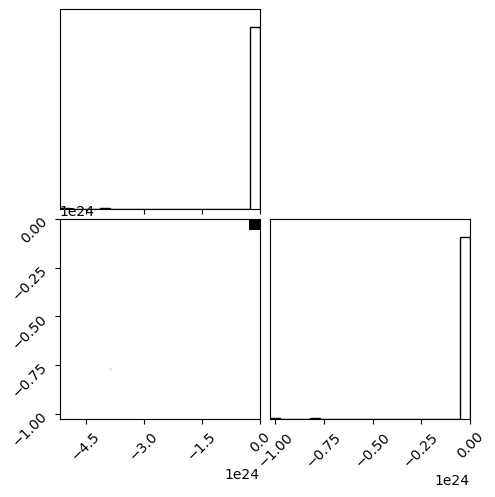

In [44]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [45]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-19.757409164854376, -75.47030244064452)